# Exploratory Data Analysis

In [82]:
awards = pd.DataFrame(movieData['Awarded']) #response
numData = pd.DataFrame(movieData[['popularity','budget','runtime','vote_average','vote_count','imdbRating','imdbVotes','BoxOffice']]) #predictor

In [83]:
movieData = pd.read_csv('movies.csv')

In [84]:
numData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    4187 non-null   float64
 1   budget        4187 non-null   int64  
 2   runtime       4187 non-null   float64
 3   vote_average  4187 non-null   float64
 4   vote_count    4187 non-null   int64  
 5   imdbRating    4187 non-null   float64
 6   imdbVotes     4187 non-null   int64  
 7   BoxOffice     4187 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 261.8 KB


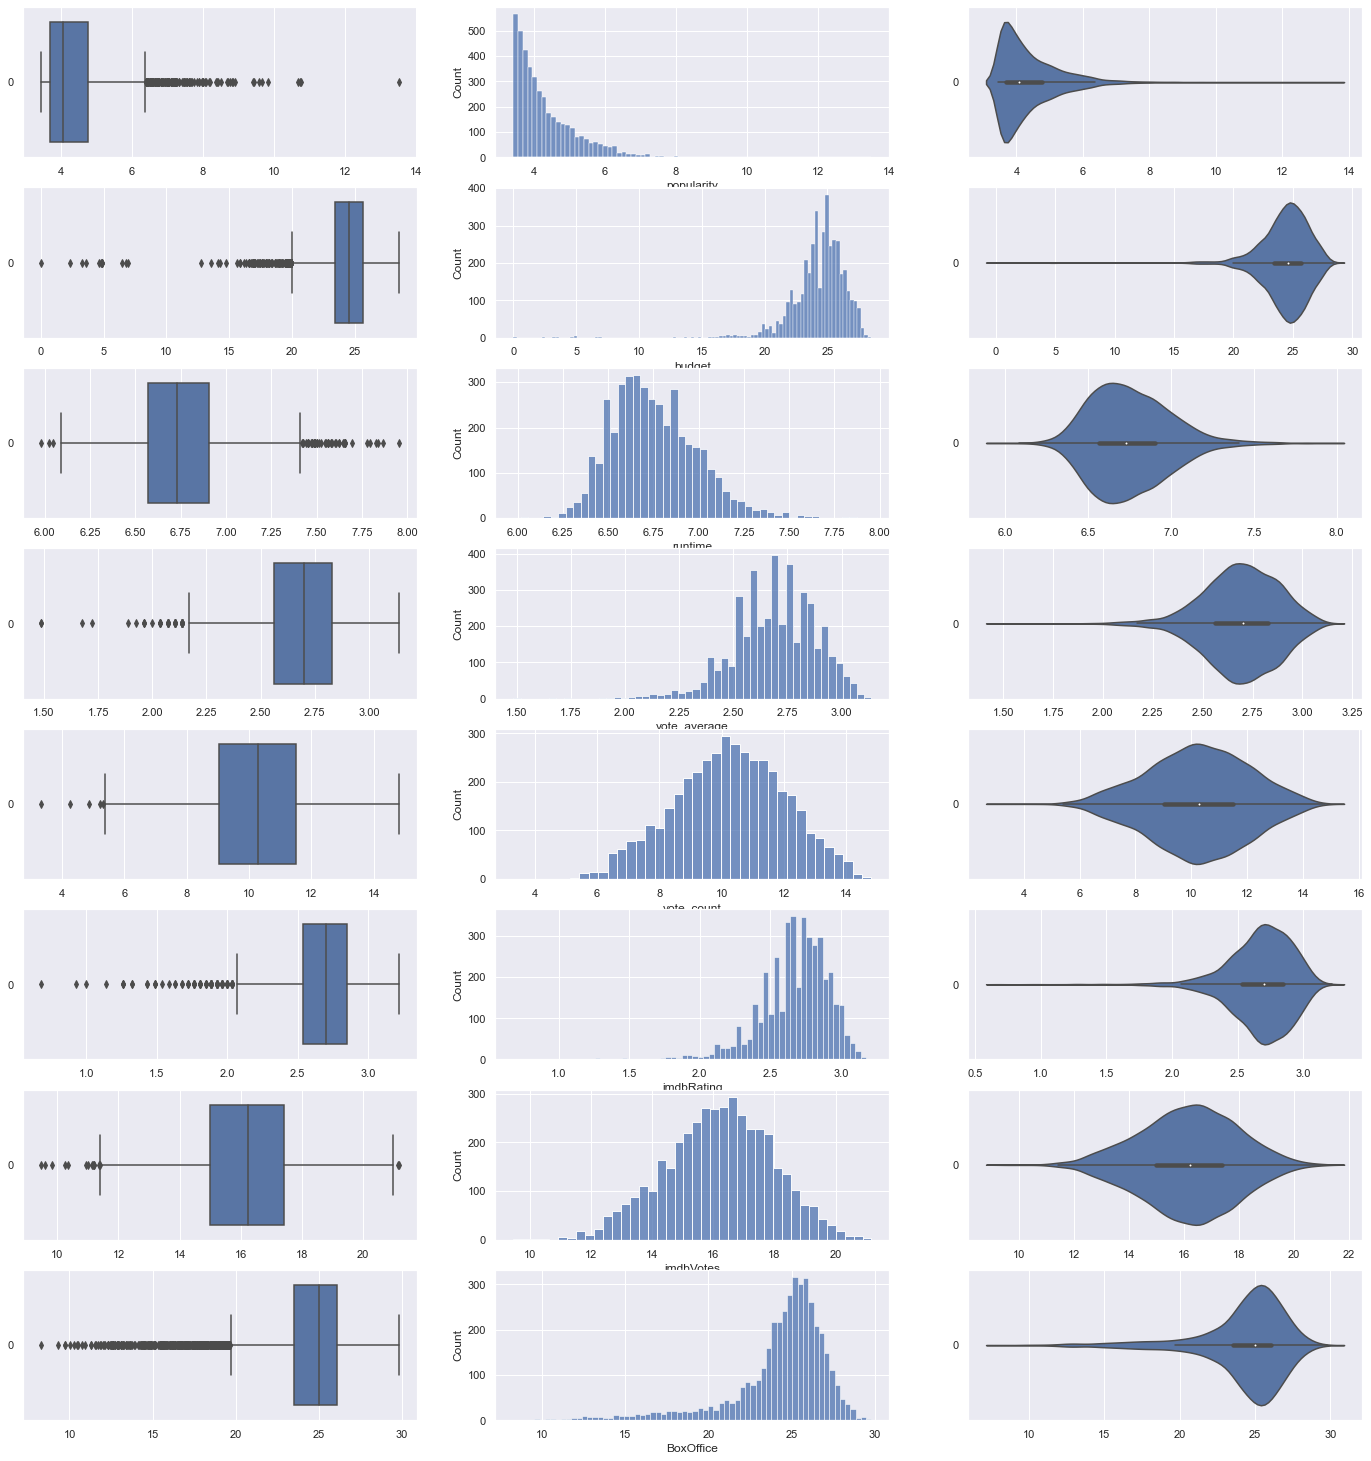

In [85]:
numData_log = numData
f, axes = plt.subplots(8, 3, figsize=(24, 26))

count = 0
for var in numData_log: #numData variables are logged for normalization
    numData_log[var] = np.log2(numData_log[var])
    sb.boxplot(data = numData_log[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numData_log[var], ax = axes[count,1])
    sb.violinplot(data = numData_log[var], orient = "h", ax = axes[count,2])
    count += 1

C:\Users\chunw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array(['Arabic', 'Cantonese', 'Danish', 'English', 'French', 'German',
        'Greek', 'Hindi', 'Indonesian', 'Italian', 'Japanese', 'Korean',
        'Mandarin', 'Norwegian', 'Norwegian Bokmål', 'Persian',
        'Portuguese', 'Russian', 'Spanish', 'Swedish', 'Tamil', 'Telugu',
        'Thai'], dtype=object),
 array([   1,   13,    3, 4004,   27,    7,    1,    6,    2,   10,   32,
          21,   20,    4,    1,    1,    3,    2,   21,    2,    1,    2,
           3], dtype=int64))

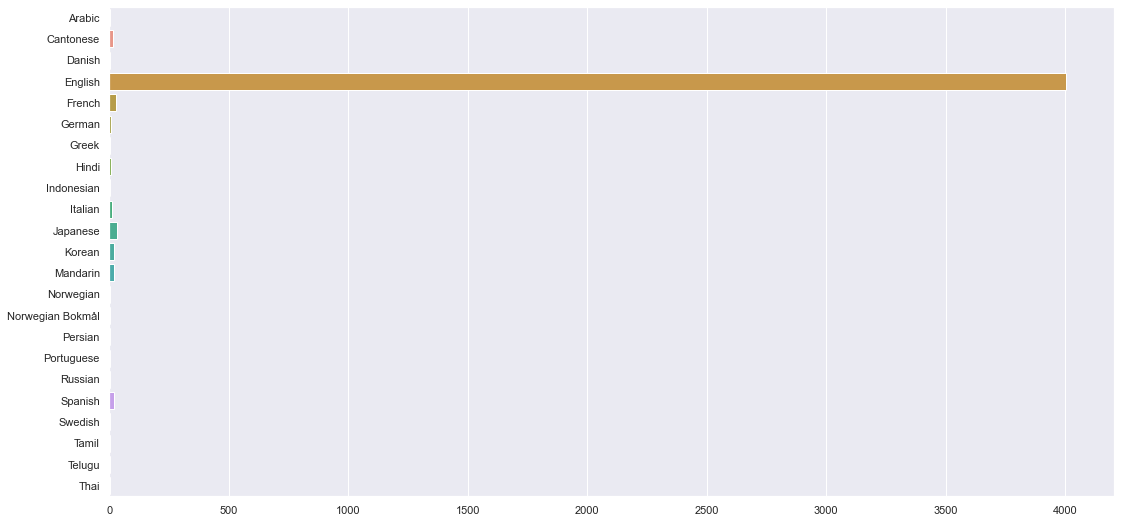

In [86]:
#make a series to analyse the unique languages and their counts
s = movieData.iloc[:,3] #14 for Original Language

val, cnt = np.unique(s, return_counts=True)
plt.figure(figsize=(18, 9))
sb.barplot(cnt, val)

val, cnt 

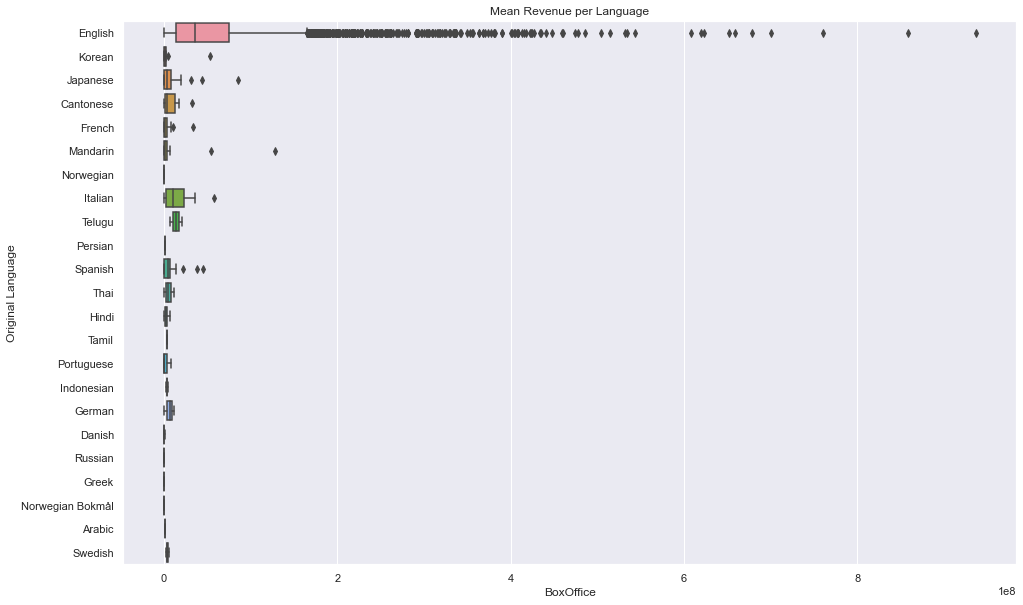

In [87]:
plt.figure(figsize=(16, 10))
sb.boxplot(x='BoxOffice', y='Original Language', data=movieData);
plt.title('Mean Revenue per Language');

ENGLISH movies are the movies that bring in higher revenue, aside from english, ZH (Mandarin) movies seem to have higher revenue compared to the others.

## Distribution of movies by Main Genre (using WORDCLOUD and classic BARPLOT)

In [88]:
#need to replace nan float with NAN string
df1 = movieData['Main Genre'].replace(np.nan, 'NAN', regex=True)

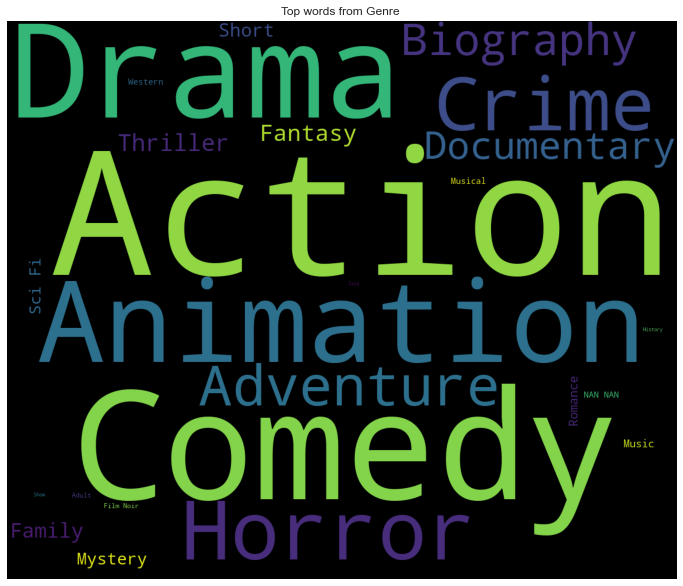

 Time taken to complete this operation is 0.9933786392211914 seconds


In [89]:
#let's find top words from MAIN GENRE
start = time.time()
plt.figure(figsize = (12, 12))
token_title = ' '.join(df1.values) #create split to title by sprace to extract the text.
#bg color set to white for good contrast, by default bg color is darker
wordcloud = WordCloud(max_font_size=None, background_color='black', width=1200, height=1000).generate(token_title)
plt.imshow(wordcloud)
plt.title('Top words from Genre ')
plt.axis("off") # we dont need axes for this
plt.show()
print(" Time taken to complete this operation is", time.time() - start, 'seconds')

<BarContainer object of 10 artists>

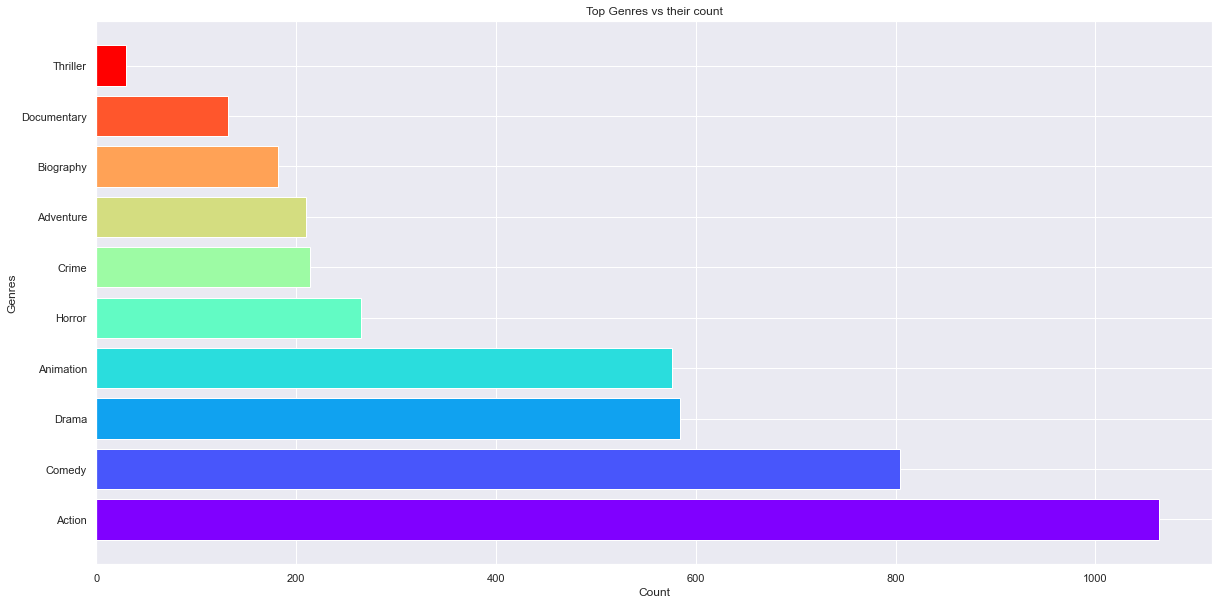

In [90]:
test=list(df1)

temp=""
for p in test:
        temp= temp + p
        temp+=' '
temp=temp.replace(".", " ").replace(",", "")

import collections
filtered_words = [word for word in temp.split()]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

import matplotlib.cm as cm
from matplotlib import rcParams
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top Genres vs their count')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.barh(words, counts, color=colors)

## Categorical data: "Awarded"

### Count Plot for Awarded

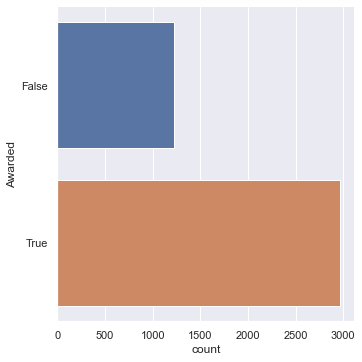

In [91]:
sb.catplot(y = "Awarded", data = awards, kind = "count")

Data seems imbalanced, but we will cover that later on when we are using the data

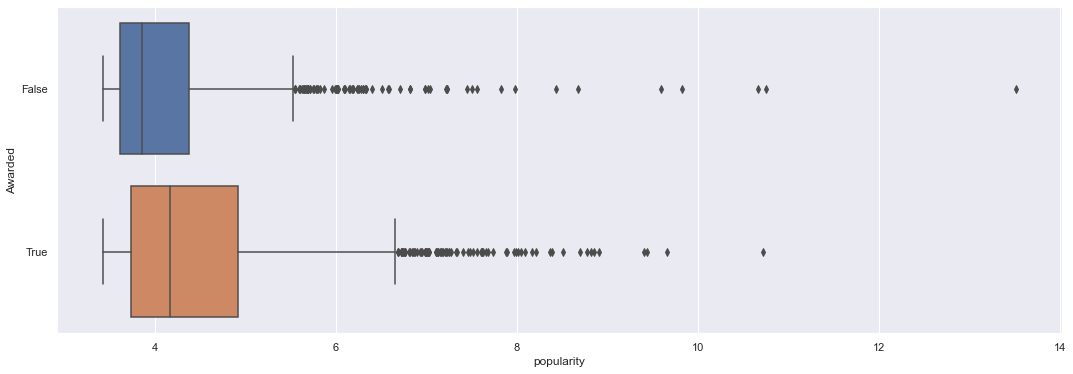

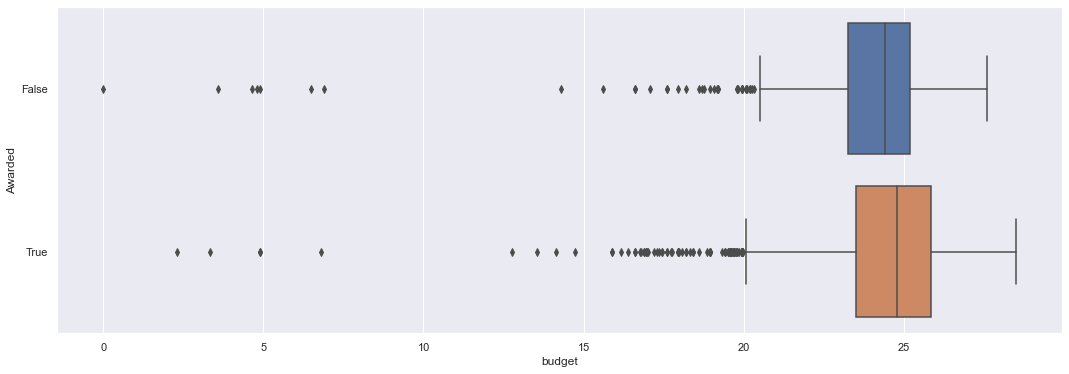

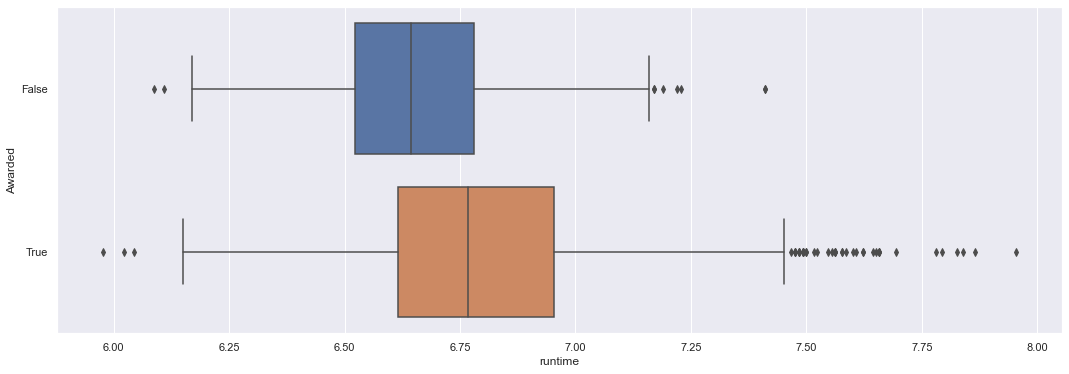

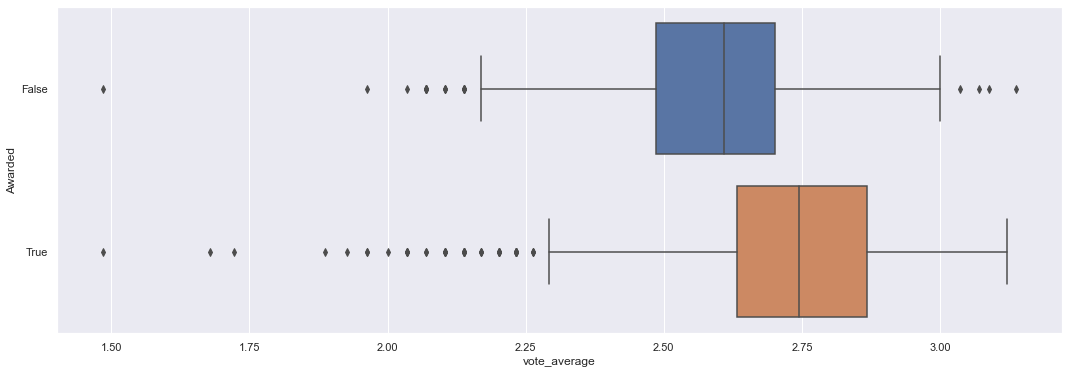

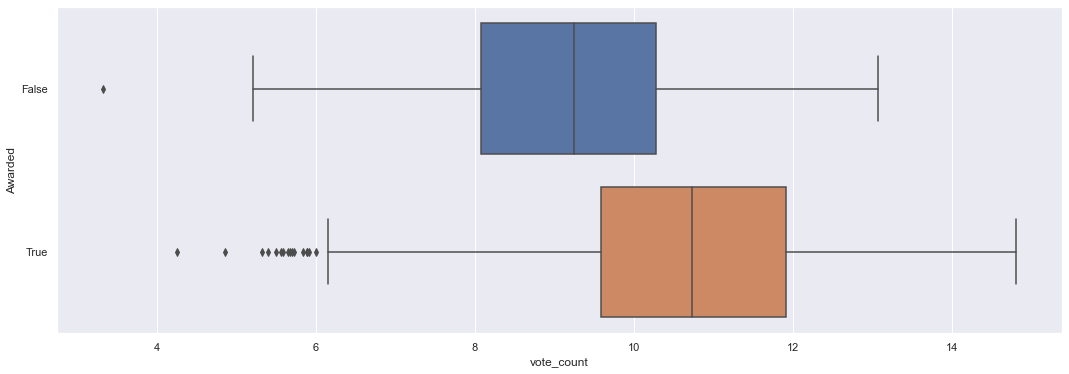

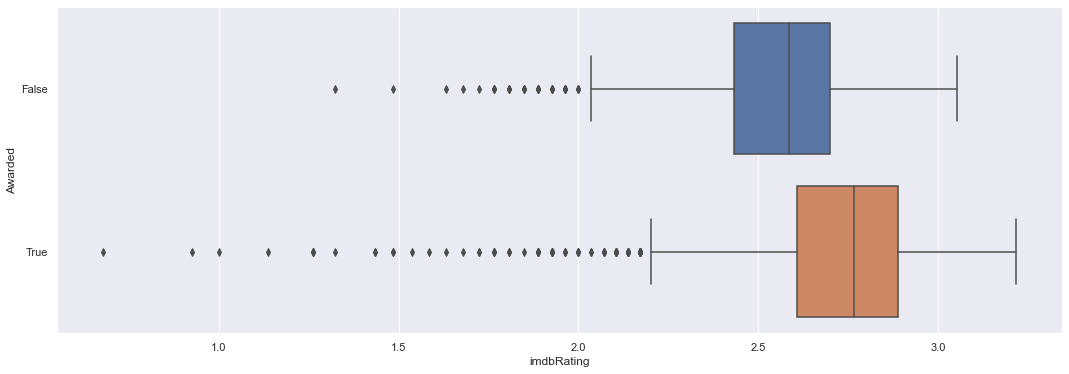

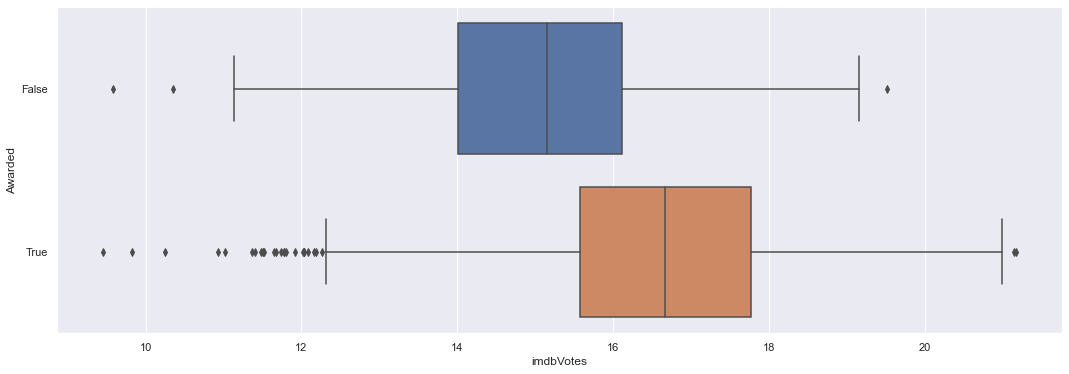

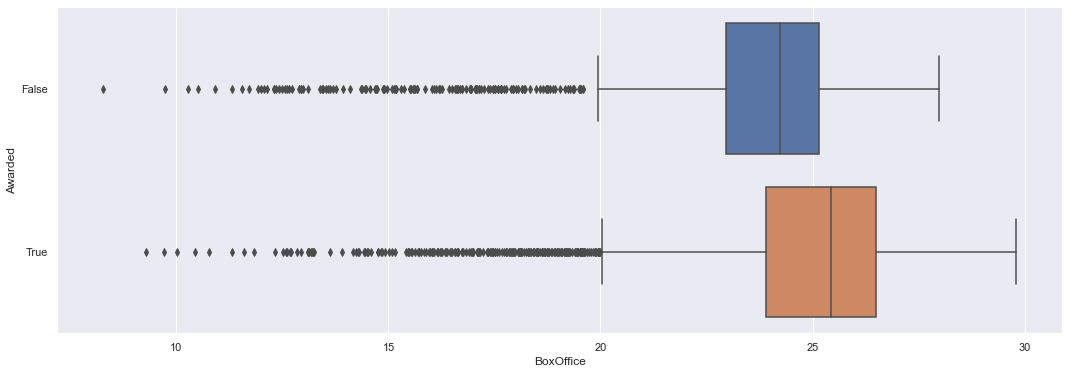

In [92]:
# Create a joint dataframe by concatenating numData_log and awards
jointDF = pd.concat([numData_log, awards], axis = 1).reindex(awards.index)

# Joint Boxplot of numData variables against awards
for var in numData_log:
    f = plt.figure(figsize=(18, 6))
    sb.boxplot(x = var, y = "Awarded", data = jointDF, orient = "h")

There's no clear separation between the boxplots for each variable. Hence, not much can be concluded about which variables are the most important in predicting awarded movies.

One thing to note is that, for all the variables, the mean is higher for those movies which received awards.